Seaborn est une libriairie construite sur la base de matplotlib et de pandas qui donne des graphes avec seulement une ligne de code 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
Iris= pd.read_csv('iris.csv')

In [7]:
Iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Analyse de datasets avec Seaborn**

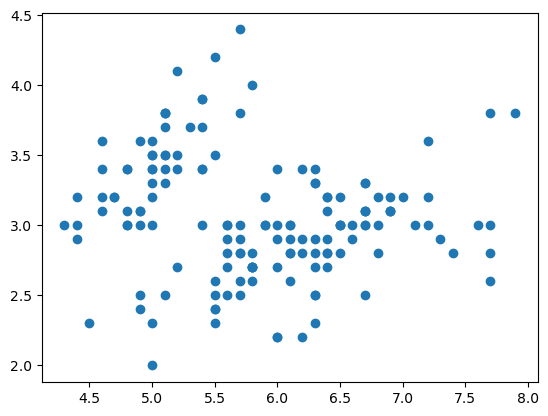

In [16]:
#Pour visualiser les données  longueur en fonction de largeur du sepal par exple
#en utilisant plotlib 
plt.scatter(Iris['sepal.length'], Iris['sepal.width'])
plt.show()

Cependant c'est naze parsk pas d'axes, de couleurs de titres , pas de distinction pour les variétés de fleurs ...pas de vrai analyse possible sachant qu'on a pas 2 mais plusieurs variables

Avec seaborn

In [22]:
import seaborn as sns

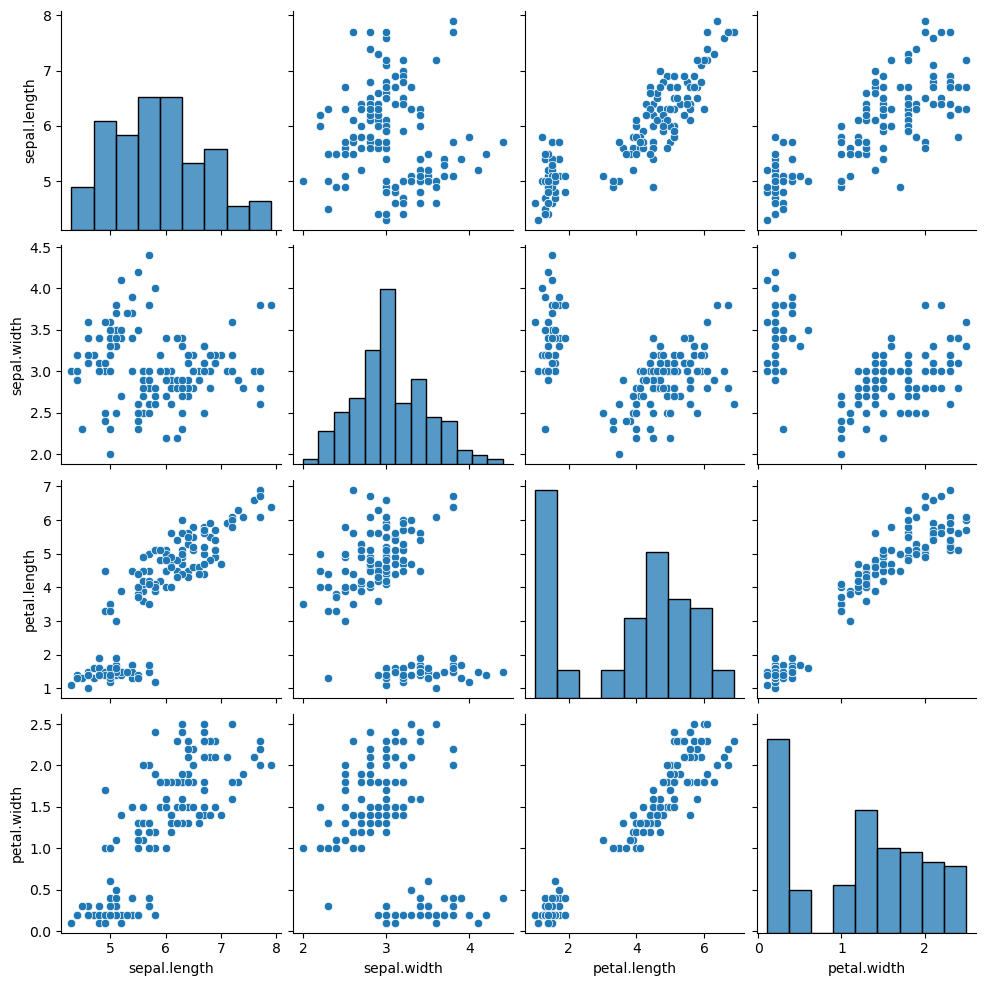

In [24]:
sns.pairplot(Iris) #pairplot de notre dataset iris

On trouve des tas de figures entre les différentes variables... Les histogrammes permettent de voir la répartition des données selon chaque variable

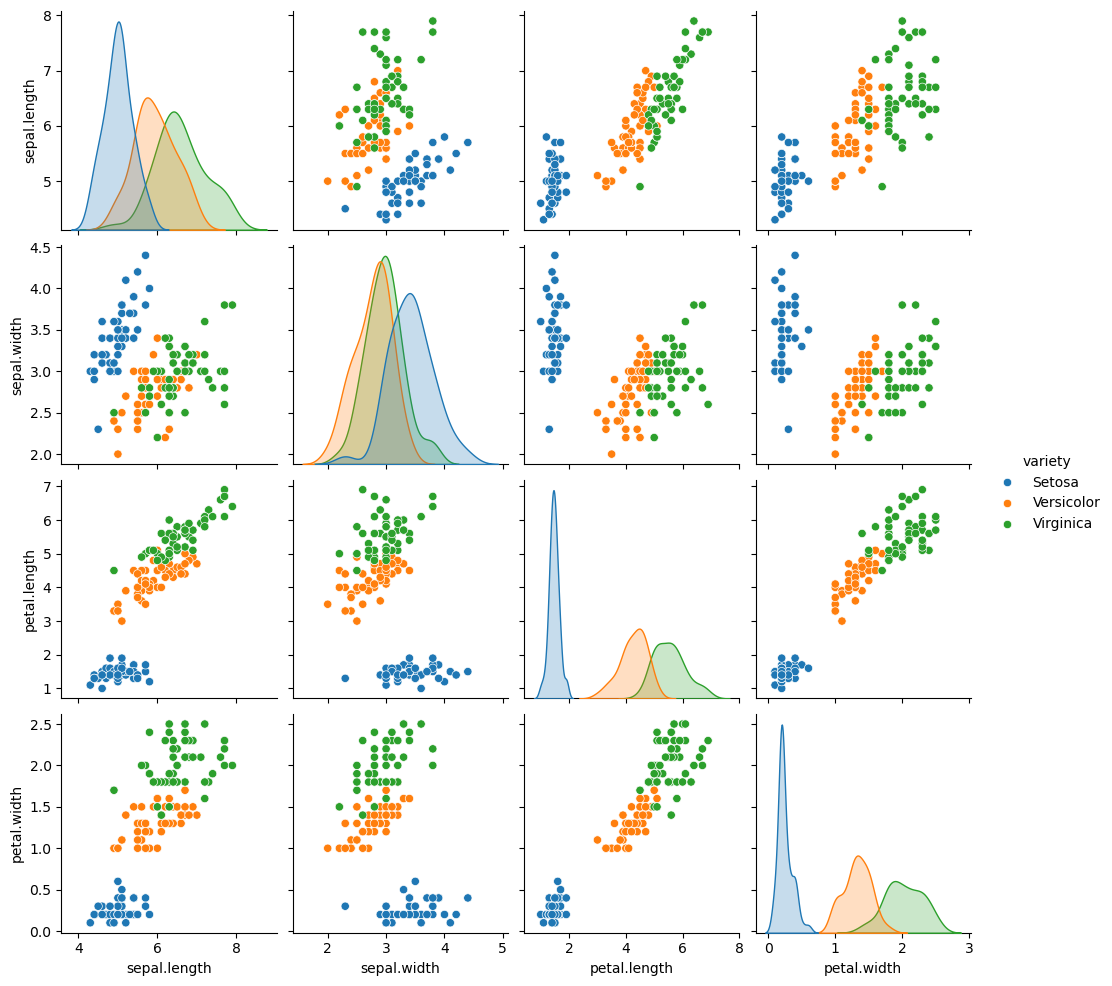

In [27]:
sns.pairplot(Iris, hue = 'variety') #avec ça on a de la distinction 

par exple là si on regarde les histogrammes, on peut voir que la taille des pétales suffit pour différencier un setosa des 2 autres vu qu'il n'ya pas de contact avec le pic bleu et celui des 2 autres 

aller voir le site de seaborn surtout pour la partie API pas trop de fonctions organisées pour faire des catégories, des distributions, des relations...

 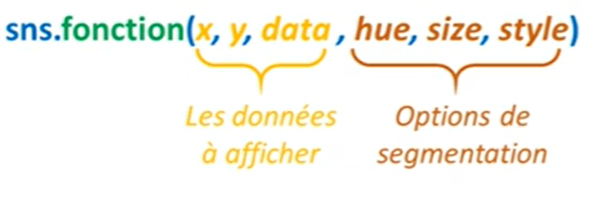

In [39]:
#Partons sur une autre dataset
titanic = sns.load_dataset('titanic')
titanic.dropna(axis=0, inplace=True) #axis=0 pour dire que dès que y a NaN il fait sauter la ligne et inplace pour modifier pas créer une dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


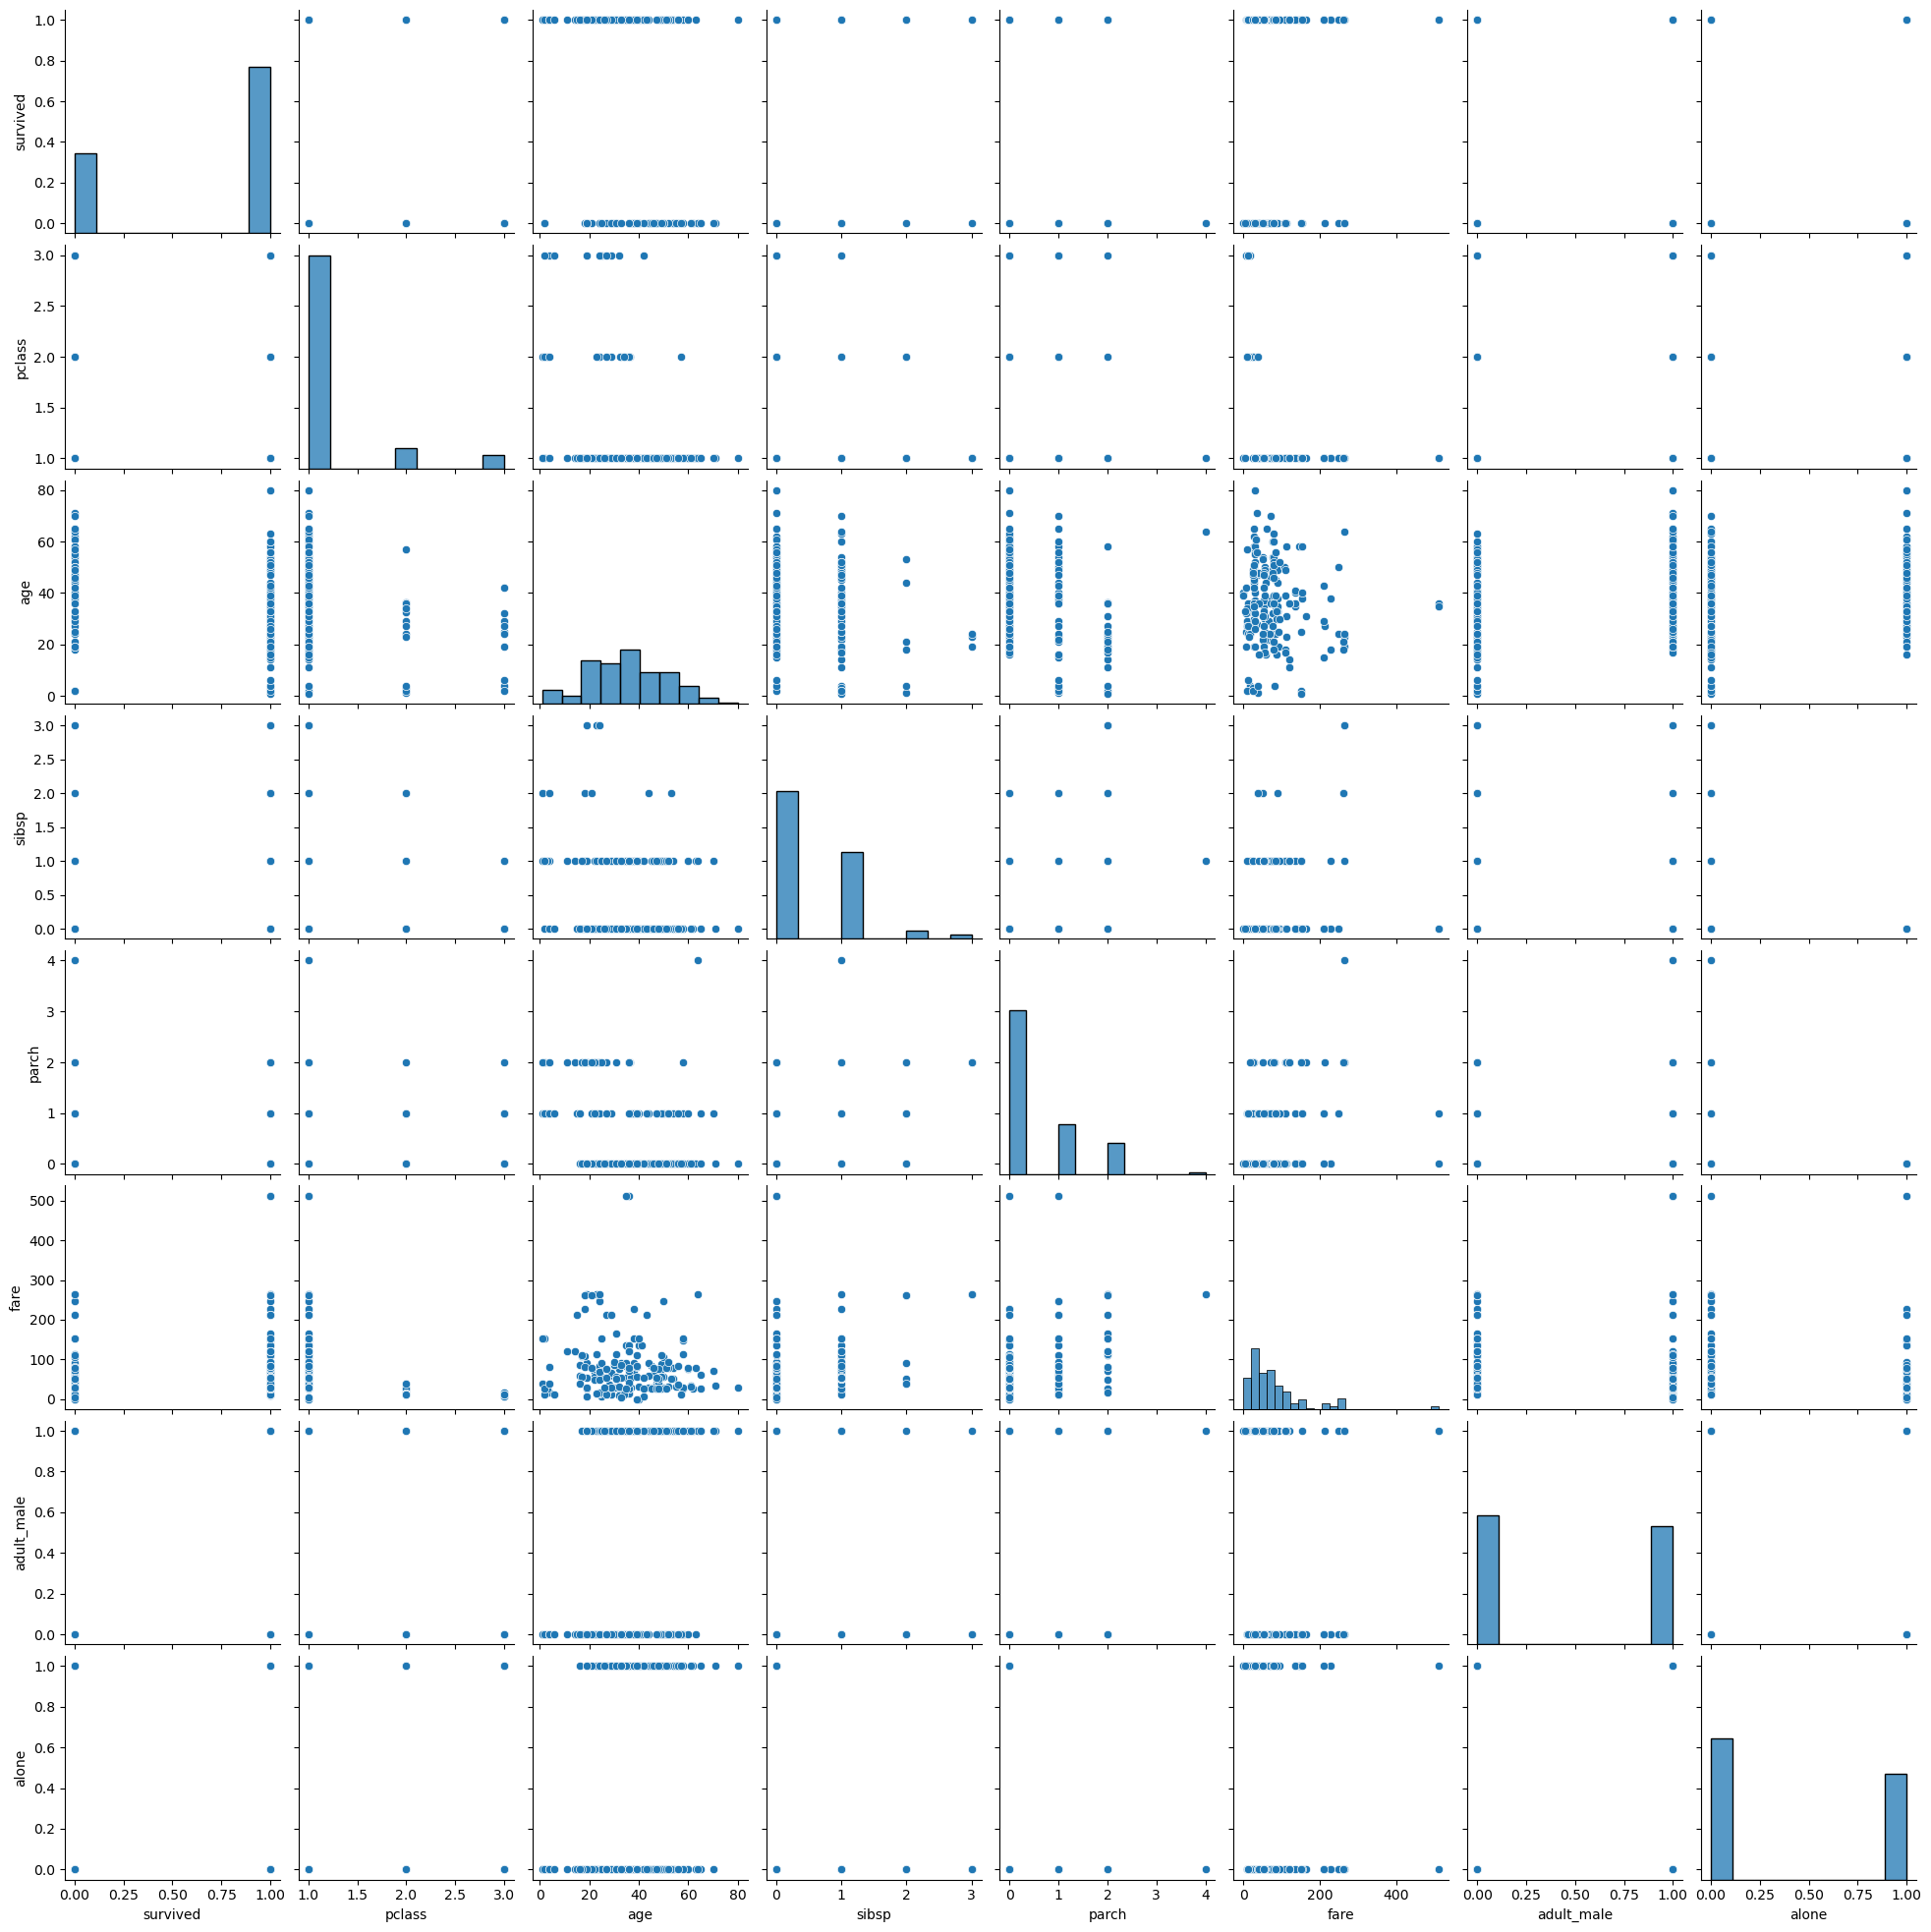

In [42]:
sns.pairplot(titanic)

On voit sur ces courbes qu'il y a des courbes qui donnent pas vraiment d'infos parsk on  a à faire à des catégories 
Avec categorical plot notre vie va changer 

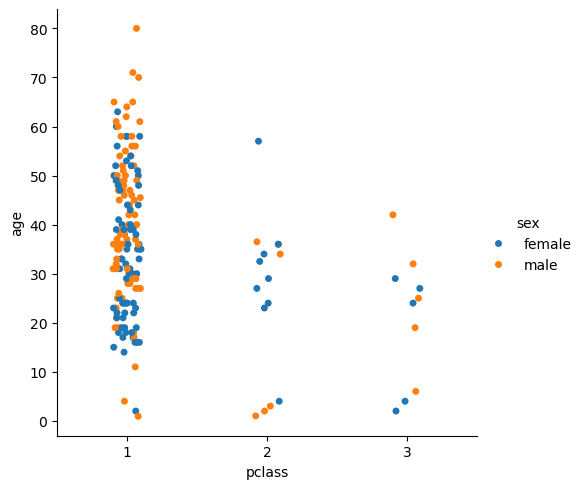

In [51]:
sns.catplot(x='pclass',y='age', data=titanic, hue='sex')

<Axes: xlabel='pclass', ylabel='age'>

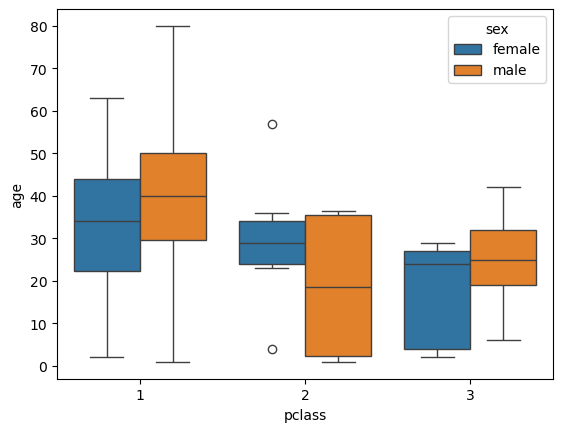

In [53]:
#on va voir avec boxplot qui est similaire

sns.boxplot(x='pclass',y='age', data=titanic, hue='sex')

Explication des boxplots

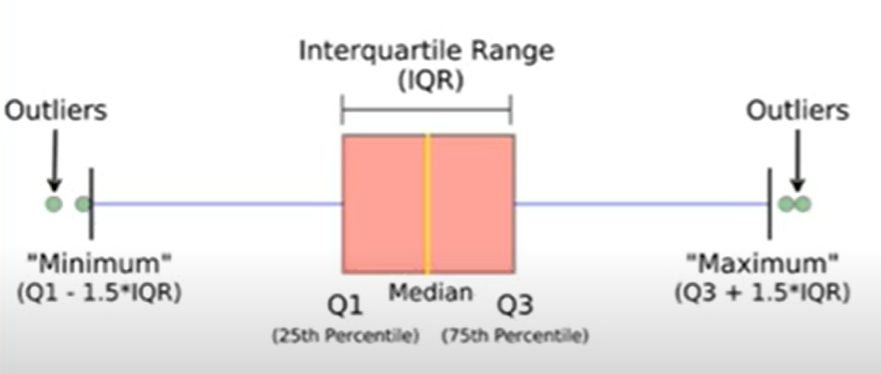

Les boxplots permettent de voir la répartition des données avec des données statistiques, médiane quartile... au milieu de la boxplot on retoruve la médiane d'une série de données là il met l'age Si on regarde les extremites du rectangle la classe 1 on voit que les hommes entre 30 et 50 ans. Et on a les outliers (anomalies en points à coté) que je peux voir pour les femmes en classe 2

La médiane est le point milieu d'un jeu de données, de sorte que 50 % des unités ont une valeur inférieure ou égale à la médiane et 50 % des unités ont une valeur supérieure ou égale.
La moyenne c'est juste lui plus lui divisé par 2 (whippin sur 2 données) du coup en cas de volatilité extréme c'est pas représentatif du jeu de données dans sa globalité.

C:\Users\LENOVO T480\AppData\Local\Temp\ipykernel_16564\1215563534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'])


<Axes: xlabel='fare', ylabel='Density'>

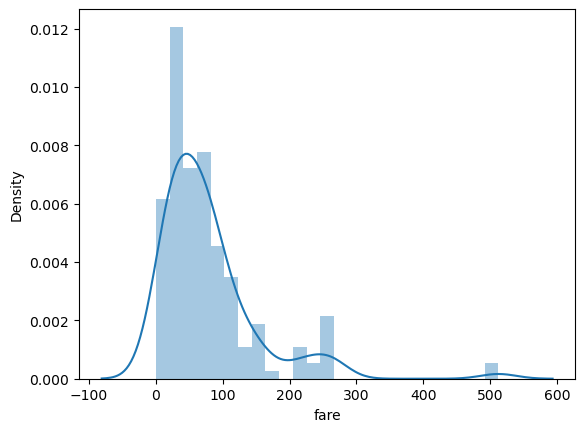

In [65]:
#Pour les distributions [fare=tarif ]

sns.distplot(titanic['fare'])


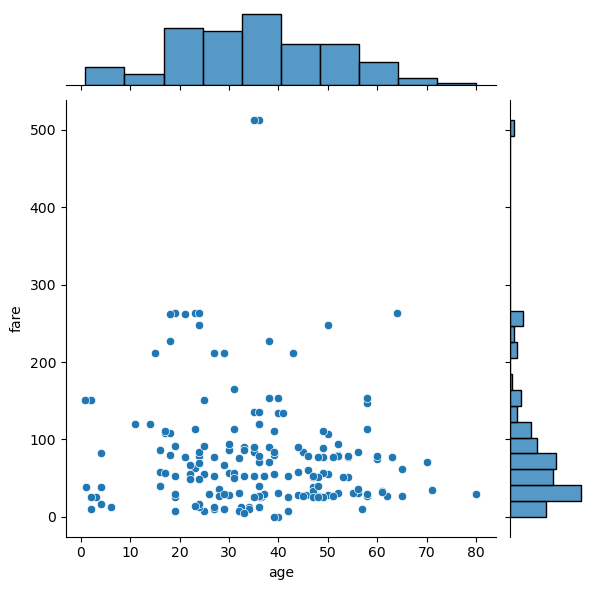

In [69]:
#La fontion jointplot permet de visualiser un paramètre selon 2 variables à la fois

sns.jointplot(x='age',y='fare', data=titanic)

#kind c'est juste le style de graphe

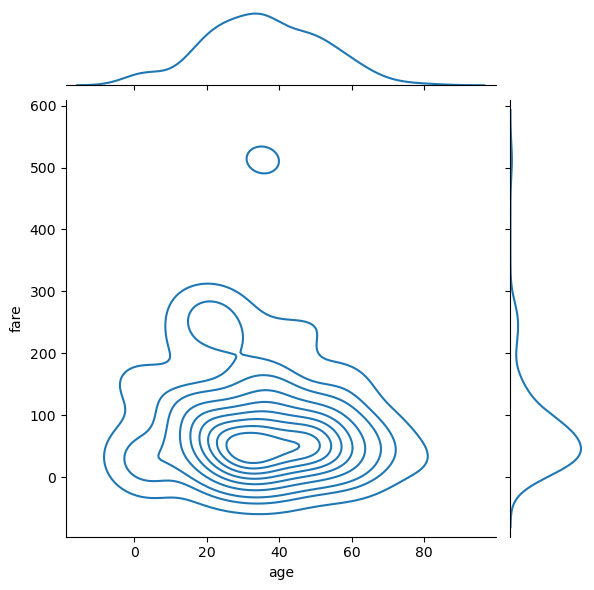

In [71]:
#kind c'est juste le style de graphe
sns.jointplot(x='age',y='fare', data=titanic, kind='kde')

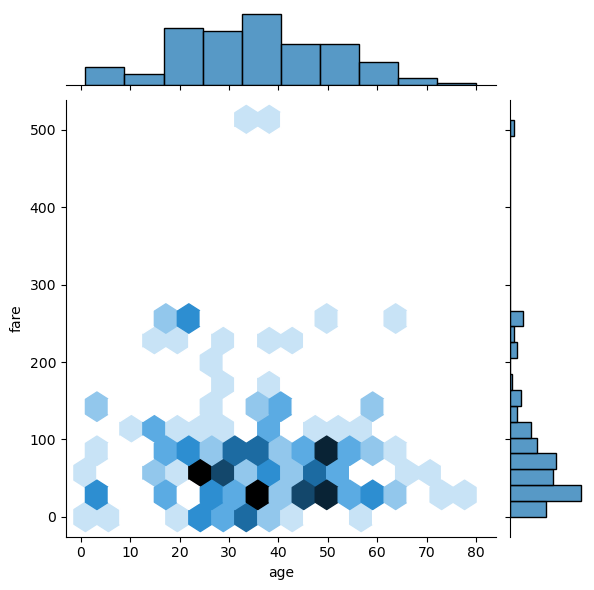

In [73]:
sns.jointplot(x='age',y='fare', data=titanic, kind='hex')

<Axes: >

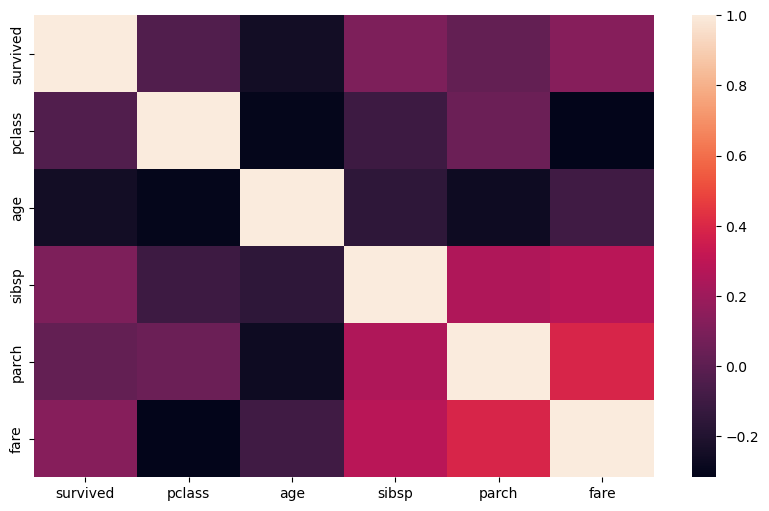

In [85]:
#Imaginons on veut visualiser les corélations entre les différents paramètres 
#dans notre dataset il y a des string comme sexe  et pour la corrélation faut des chiffres
#filtrer les colonnes numériques
titanic_numeric = titanic.select_dtypes(include=[np.number])

# np.number est une classe avec tous les types 
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_numeric.corr())


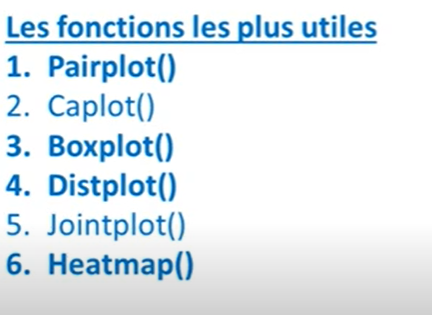

Selon les situations qu'utiliser entre seaborn et matplotlib

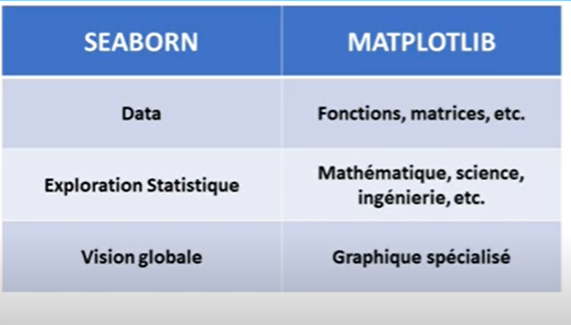

Pour des graphes très détaillés on sera obligé d'utiliser matplotlib car seaborn c'est pour une vision globale